In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from pmdarima.arima import auto_arima

import sys
sys.path.append('/Users/macbook/Desktop/projects/Github_Repositories/cfa_binance/docs')
from config import path_data_raw, path_data_proceed

import warnings
warnings.filterwarnings("ignore")

%load_ext autotime

In [2]:
# Assets dataframe
df_assets = pd.DataFrame({'id_asset' : [1,2,3],
                         'name' : ['BTCUSDT', 'ETHBTC', 'ETHUSDT']})
df_assets

,id_asset,name
0,1,BTCUSDT
1,2,ETHBTC
2,3,ETHUSDT


time: 47.3 ms


In [3]:
# Read Daily Data and select Asset 1 

df01 = pd.read_csv(f'{path_data_raw}/All_2017_01_01_to_2023_05_31_daily.csv')
df = df01.loc[df01.id_asset == 1]
df.index = df['timestamp']
df.tail(3)

,id_asset,timestamp,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
timestamp,,,,,,,,,,,,,
2023-05-29,1,2023-05-29,28065.01,28447.14,27524.60,27736.40,42385.41945,2023-05-29 23:59:59.999,1.182679e+09,805579,20199.85331,5.637221e+08,0.0
2023-05-30,1,2023-05-30,27736.39,28038.59,27554.00,27694.40,32686.75371,2023-05-30 23:59:59.999,9.086539e+08,745633,15196.52438,4.224386e+08,0.0
2023-05-31,1,2023-05-31,27694.39,27835.51,26968.49,27192.67,19028.31324,2023-05-31 23:59:59.999,5.202725e+08,336941,8649.67632,2.363077e+08,0.0


time: 123 ms


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2114 entries, 2017-08-17 to 2023-05-31
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_asset                      2114 non-null   int64  
 1   timestamp                     2114 non-null   object 
 2   open                          2114 non-null   float64
 3   high                          2114 non-null   float64
 4   low                           2114 non-null   float64
 5   close                         2114 non-null   float64
 6   volume                        2114 non-null   float64
 7   close_time                    2114 non-null   object 
 8   quote_asset_volume            2114 non-null   float64
 9   number_of_trades              2114 non-null   int64  
 10  taker_buy_base_asset_volume   2114 non-null   float64
 11  taker_buy_quote_asset_volume  2114 non-null   float64
 12  ignore                        2114 non-null   float6

In [5]:
df.describe()

,id_asset,open,high,low,close,volume,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
count,2114.0,2114.000000,2114.000000,2114.000000,2114.000000,2114.000000,2.114000e+03,2.114000e+03,2114.000000,2.114000e+03,2114.0
mean,1.0,19815.431783,20357.584858,19203.586930,19826.348510,77094.103321,1.676514e+09,1.480754e+06,38373.741524,8.311591e+08,0.0
std,0.0,16216.903125,16658.945276,15705.342135,16214.227022,87711.020686,2.138445e+09,2.083703e+06,43618.795911,1.061959e+09,0.0
min,1.0,3188.010000,3276.500000,2817.000000,3189.020000,228.108068,9.778657e+05,2.153000e+03,56.190141,2.413638e+05,0.0
25%,1.0,7501.020000,7706.115000,7310.612500,7502.712500,31361.662583,2.605932e+08,2.743758e+05,15802.945650,1.336315e+08,0.0
50%,1.0,11358.045000,11672.995000,11020.505000,11364.610000,48539.862446,6.904508e+08,7.334935e+05,24309.000630,3.375251e+08,0.0
75%,1.0,29273.587500,29984.007500,28667.660000,29273.590000,82431.379962,2.465413e+09,1.613517e+06,40595.166601,1.230626e+09,0.0
max,1.0,67525.820000,69000.000000,66222.400000,67525.830000,760705.362783,1.746531e+10,1.522359e+07,374775.574085,8.783916e+09,0.0


time: 207 ms


In [6]:
df.isna().sum()

id_asset                        0
timestamp                       0
open                            0
high                            0
low                             0
close                           0
volume                          0
close_time                      0
quote_asset_volume              0
number_of_trades                0
taker_buy_base_asset_volume     0
taker_buy_quote_asset_volume    0
ignore                          0
dtype: int64

time: 9.43 ms


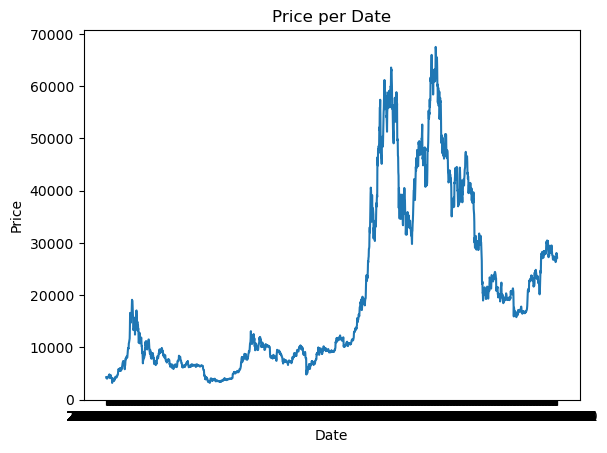

time: 16.1 s


In [7]:
# Plot 01- Close Price

plt.plot(df.index, df['close'])
plt.title('Price per Date')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

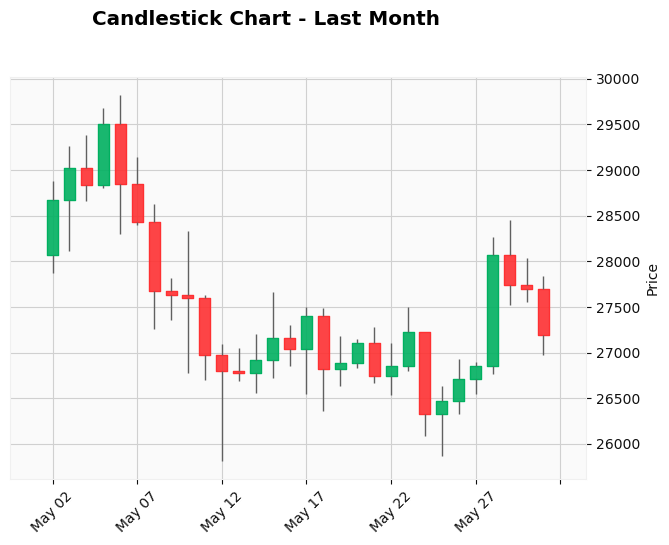

time: 512 ms


In [10]:
# Please add an Candle stick diyagram for last month 
# Select the last month of data
last_month_df = df.iloc[-30:]
# Convert the index to DatetimeIndex
last_month_df.index = pd.to_datetime(last_month_df.index)
# Create the candlestick chart
mpf.plot(last_month_df, type='candle', style='yahoo', title='Candlestick Chart - Last Month')
# Display the chart
plt.show() 

In [9]:
# Train test split
to_row = int(len(df)*0.9) #==> get 90% data for train , 10% data for test

train_df = df[0:to_row]['close']
test_df = df[to_row:]['close']

train_data = list(train_df)
test_data = list(test_df)
print(len(train_data), len(test_data))
train_data[:5]

1902 212


[4285.08, 4108.37, 4139.98, 4086.29, 4016.0]

time: 13.6 ms


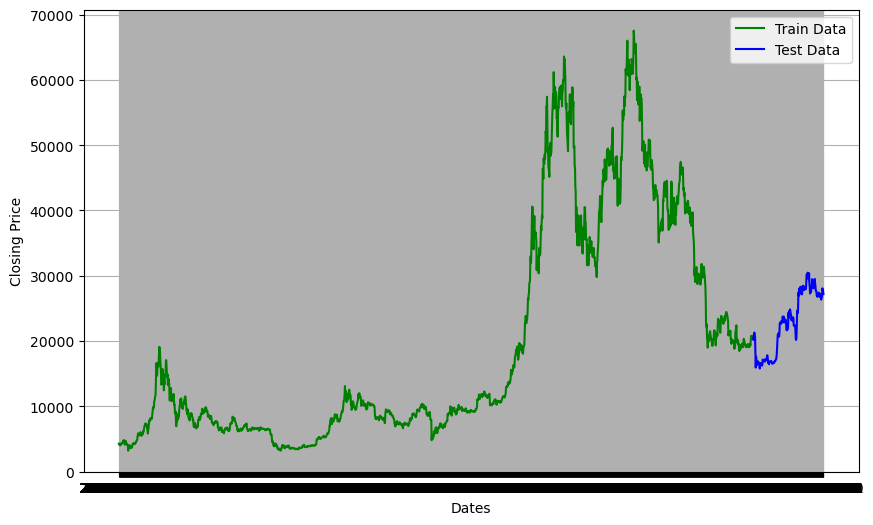

time: 16.6 s


In [10]:
# Plot 02 - splited data into a train and training set

plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Price')
plt.plot(train_df, 'green', label= 'Train Data')
plt.plot(test_df, 'blue', label= 'Test Data')
plt.legend()
plt.show()

# Model Prediction with ARIMA

In [11]:
# Model Predictin with ARIMA
model_predictions = []
n_test_obser = len(test_data)
n = 0

for i in range(n_test_obser):
    model = ARIMA(train_data, order = (4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    actual_test_value = test_data[i]
    train_data.append(actual_test_value)   # ==> Add actual value to train data , we need to append the value for forecasting the next day 
    n+=1
    
    if n % 10 == 0:
        print(f'{n} ,yhat = {yhat} , actual value = {actual_test_value}')

10 ,yhat = 15982.652884103405 , actual value = 17601.15
20 ,yhat = 16694.25150580058 , actual value = 16280.23
30 ,yhat = 16431.935752572088 , actual value = 17163.64
40 ,yhat = 17129.631249507493 , actual value = 17127.49
50 ,yhat = 16430.656134547557 , actual value = 16895.56
60 ,yhat = 16627.97514690085 , actual value = 16607.48
70 ,yhat = 17123.81845118531 , actual value = 17178.26
80 ,yhat = 20697.666464596066 , actual value = 21071.59
90 ,yhat = 23036.010134897064 , actual value = 23742.3
100 ,yhat = 23211.542248850772 , actual value = 22963.0
110 ,yhat = 24600.286725831902 , actual value = 24631.95
120 ,yhat = 23471.5086354988 , actual value = 23141.57
130 ,yhat = 20400.237654611945 , actual value = 20150.69
140 ,yhat = 28023.950127135053 , actual value = 27717.01
150 ,yhat = 28307.786171456413 , actual value = 28028.53
160 ,yhat = 27933.662987159347 , actual value = 28323.76
170 ,yhat = 30342.61916828854 , actual value = 28797.1
180 ,yhat = 29348.02264918769 , actual value = 29

# Model Summary

In [12]:
# Print Model Summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2113
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -17523.904
Date:                Sun, 25 Jun 2023   AIC                          35057.808
Time:                        18:57:23   BIC                          35086.085
Sample:                             0   HQIC                         35068.162
                               - 2113                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0328      0.014     -2.373      0.018      -0.060      -0.006
ar.L2          0.0036      0.014      0.265      0.791      -0.023       0.030
ar.L3          0.0261      0.014      1.821      0.0

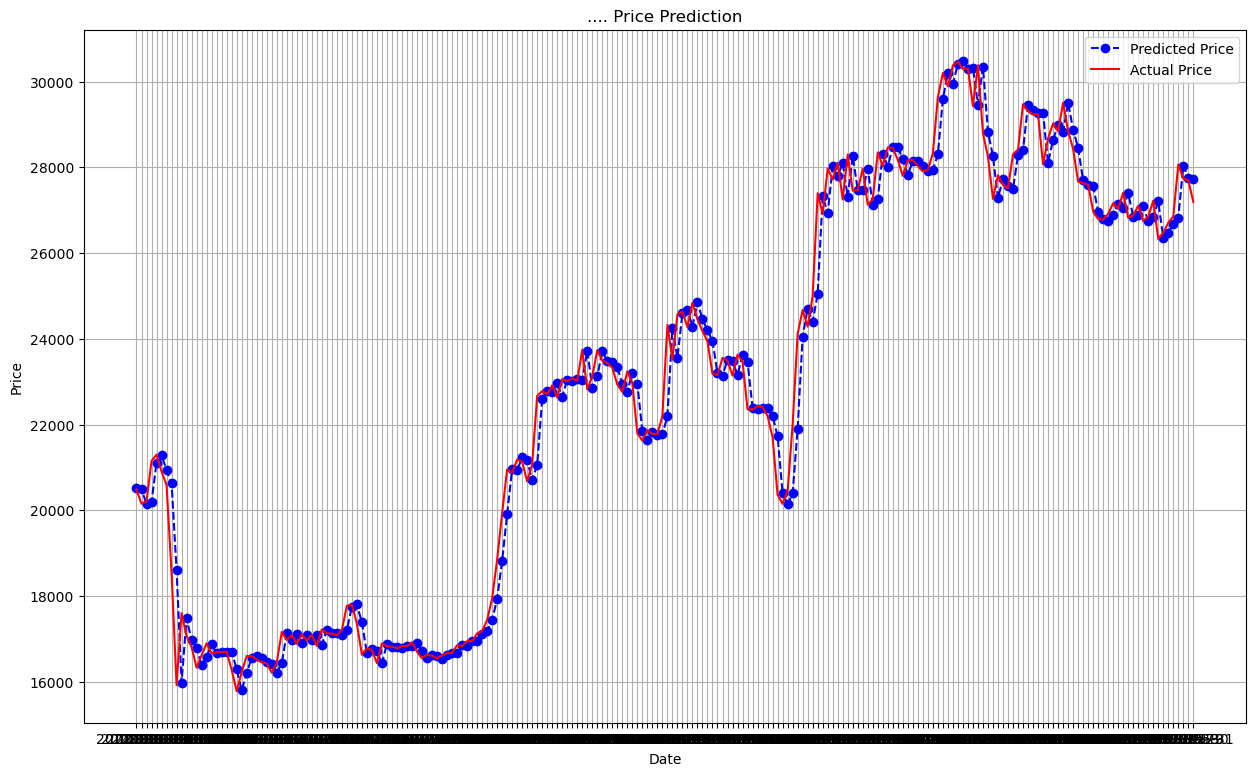

time: 2.29 s


In [13]:
# Plot 03 - Predicted and Actual Price
plt.figure(figsize=(15,9))
plt.grid(True)

data_range = df[to_row:].index

plt.plot(data_range, model_predictions, 'blue', marker ='o', linestyle = 'dashed', label = 'Predicted Price')
plt.plot(data_range, test_data, 'red', label = 'Actual Price' )

plt.title('.... Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [14]:
# report performance 
difference = np.abs(np.array(model_predictions) - np.array(test_data))
test_pred = np.abs(test_data)

mape = np.mean(difference / test_pred ) # Mean absolute percentage error

print(f'MAPE : {mape}') 
# Around 1.78% MAPE ==> The model is 98.22% accurate in predicting the test set observation.

MAPE : 0.017834806212852033
time: 1.46 ms


In [15]:
# Model Score  AIC, BIC
print("AIC:", model_fit.aic)
print("BIC:", model_fit.bic)

AIC: 35057.80755635882
BIC: 35086.08450958295
time: 1.55 ms


# Model Tunning

In [17]:
train_df = df[0:]['close']
train_data = list(train_df)

time: 3.74 ms


In [18]:
model_tunned = auto_arima(train_data) 
model_tunned

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

time: 30.3 s


In [19]:
# Model Score  AIC, BIC
print("AIC:", model_tunned.aic())
print("BIC:", model_tunned.bic())

AIC: 35062.6780539287
BIC: 35090.957374016776
time: 1.48 ms


In [20]:
# Print Model Summary
print(model_tunned.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2114
Model:               SARIMAX(2, 1, 2)   Log Likelihood              -17526.339
Date:                Sun, 25 Jun 2023   AIC                          35062.678
Time:                        18:57:56   BIC                          35090.957
Sample:                             0   HQIC                         35073.033
                               - 2114                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8195      0.013     61.031      0.000       0.793       0.846
ar.L2         -0.9534      0.013    -75.064      0.000      -0.978      -0.928
ma.L1         -0.8459      0.013    -65.280      0.0

# Save data

In [4]:
df_daily = df[['timestamp', 'id_asset', 'close']]

df_daily.to_csv(f"{path_data_proceed}/daily_proceed.csv", index=False)

time: 21.9 ms
